In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [10]:
df=pd.read_excel("korea.new.xlsx",sheet_name="korea2",skiprows=4)
df

,Unnamed: 0,Unnamed: 1
0,1900-01-01,153
1,1900-01-02,261
2,1900-01-03,382
3,1900-01-04,513
4,1900-01-05,888
5,1900-01-04,1182


In [26]:
cases=df.iloc[:,1]

In [27]:
cases

0     153
1     261
2     382
3     513
4     888
5    1182
Name: Unnamed: 1, dtype: int64

In [28]:
day=pd.Series([1,2,3,4,5,6])

In [30]:
df

,Unnamed: 0,Unnamed: 1
0,1900-01-01,153
1,1900-01-02,261
2,1900-01-03,382
3,1900-01-04,513
4,1900-01-05,888
5,1900-01-04,1182


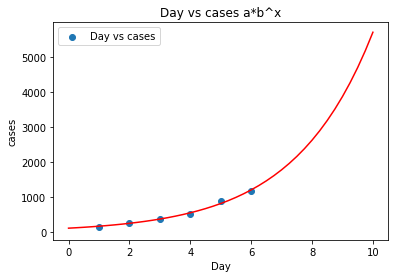

In [31]:
def func3(x, a, b):
    return a * b ** x
popt, pcov = curve_fit(func3, day, cases, p0=[1, 1e-6])
x_plot=np.linspace(0,10,41)
plt.plot(x_plot, func3(x_plot, *popt), 'r-')
plt.scatter(day,cases,label='Day vs cases')
plt.title("Day vs cases a*b^x")
plt.xlabel('Day')
plt.ylabel('cases')
plt.legend()
plt.show()

In [32]:
a=popt[0].round(4)
b=popt[1].round(4)
a

117.9396

In [33]:
b

1.4737

In [34]:
print(f'The equation of regression line is y={a}*{b}^x')

The equation of regression line is y=117.9396*1.4737^x


In [35]:
y_plot=func3(x_plot,*popt)

In [36]:
y_plot

array([ 117.93963637,  129.94481644,  143.17201442,  157.7456206 ,
        173.80268707,  191.49421656,  210.9865825 ,  232.46309365,
        256.12571789,  282.19698161,  310.92206236,  342.57109454,
        377.44170973,  415.86183573,  458.1927804 ,  504.83262943,
        556.21999   ,  612.83811553,  675.21945022,  743.95063623,
        819.67803055,  903.11378343,  995.0425355 , 1096.32879669,
       1207.92507613, 1330.88083972, 1466.35237941, 1615.61368713,
       1780.0684356 , 1961.26317861, 2160.90189502, 2380.86201324,
       2623.21206675, 2890.2311469 , 3184.43033577, 3508.57632071,
       3865.71741261, 4259.21221264, 4692.76119696, 5170.44151647,
       5696.74533887])

In [37]:
expALLDf=pd.DataFrame(list(zip(x_plot,y_plot)),columns=['day','predicted cases'])

In [40]:
expALLDf.to_csv(r'korea.final.csv')